In [1]:
import numpy as np
import pandas as pd
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/estacoes_es_summary.csv")
df.drop('Municipios',axis=1,inplace=True)
df

,Altitude,X_coord,Y_coord,CHUVA,ETP,ETR,DEF,EXC,ER/ETP,TEMP_MÉD_ANUAL
0,66,-39.96,-18.30,1036.980000,1382.294237,1036.980000,345.314237,0.000000,0.750188,24.849550
1,3,-39.75,-18.56,1164.716667,1413.227948,1164.716667,248.511281,0.000000,0.824153,25.061532
2,6,-39.76,-18.95,1394.900000,1397.763967,1298.498162,99.265805,96.401838,0.928982,24.959973
3,180,-40.75,-18.99,1250.843333,1341.710579,1151.705054,190.005525,99.138279,0.858386,24.529823
4,90,-40.09,-18.49,1127.650000,1367.365007,1127.650000,239.715007,0.000000,0.824688,24.743049
...,...,...,...,...,...,...,...,...,...,...
105,540,-41.96,-20.18,1254.900696,1091.433655,931.779638,159.654018,323.121059,0.853721,22.286776
106,650,-41.85,-20.93,1460.981283,942.421643,935.260720,7.160923,525.720562,0.992402,19.805973
107,15,-41.10,-21.48,847.469271,1279.815397,850.076399,429.738998,0.000000,0.664218,23.532368
108,20,-41.61,-21.49,936.655402,1275.524078,936.655402,338.868675,0.000000,0.734330,23.498652


In [3]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
def print_graf_linear_analyse(x_atribute,y_atribute,data):
    g = sns.jointplot(x=x_atribute, y=y_atribute, data=data,kind='reg', color='royalblue')
    model_graph = LinearRegression()
    y = data[x_atribute]
    X =np.array(data[y_atribute]).reshape(-1, 1)
    model_graph.fit(X,y)
    R2 = model_graph.score(X,y)
    r, p = stats.pearsonr(data[x_atribute], data[y_atribute])
    g.ax_joint.annotate(f'pearson= {r:.3f}, p.val= {p:.2f} , R² = {R2:.3f}',
                        xy=(0.1, 0.9), xycoords='axes fraction',
                        ha='left', va='center',
                        bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
    g.ax_joint.scatter(data[x_atribute],  data[y_atribute])
    g.set_axis_labels(xlabel=x_atribute, ylabel=y_atribute, size=15)
    plt.tight_layout()
    plt.show()

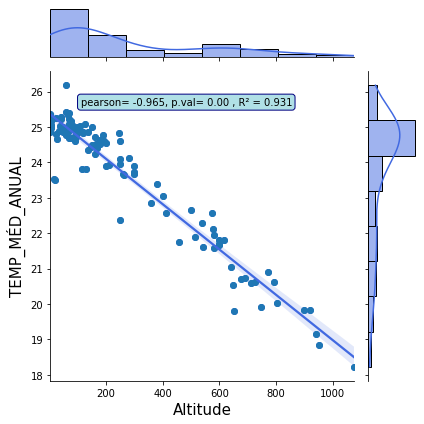

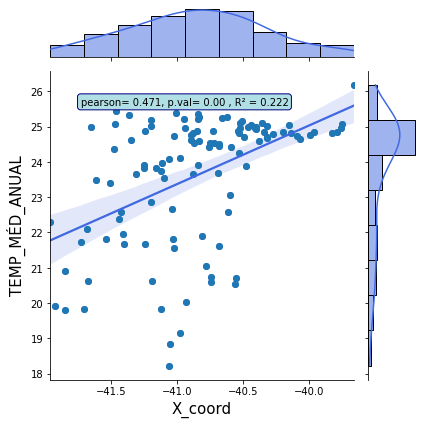

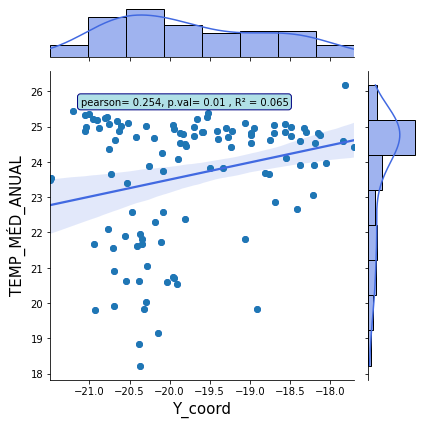

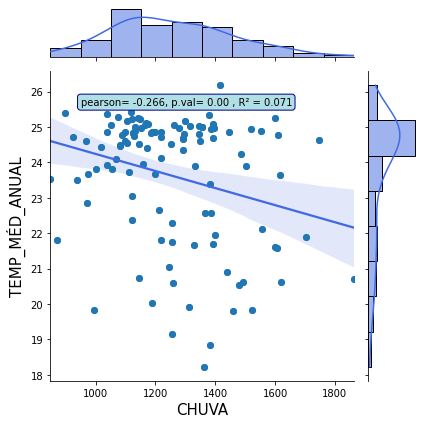

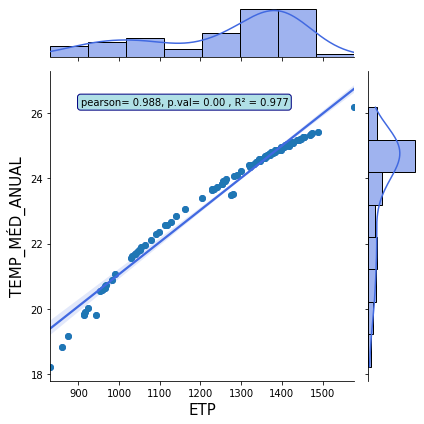

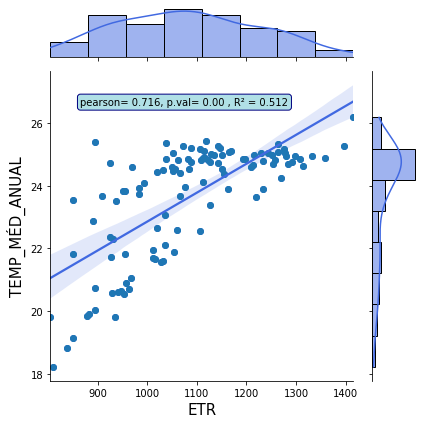

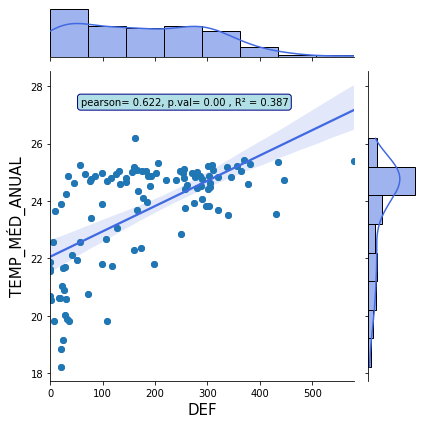

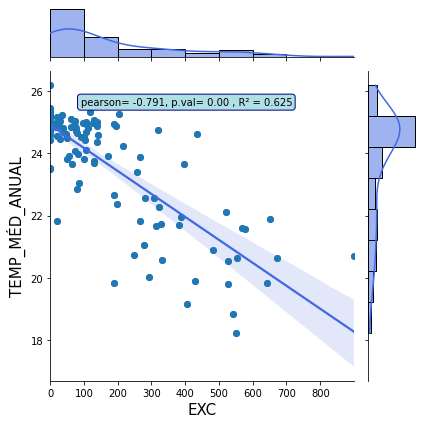

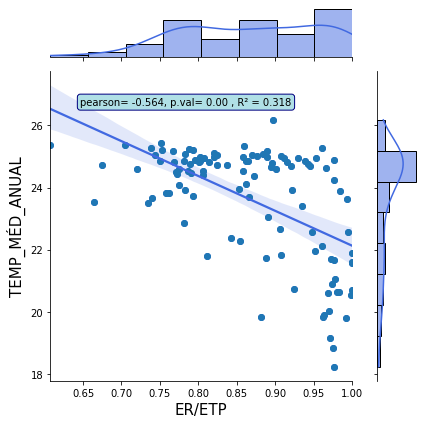

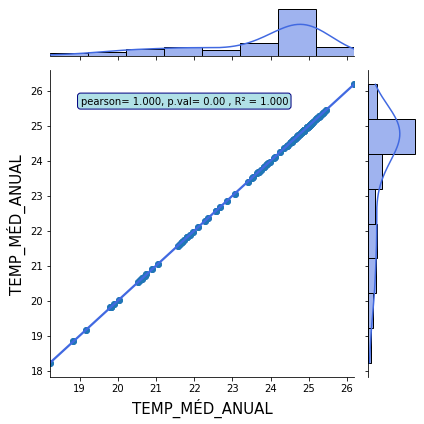

In [4]:
for atribute in df.columns:
    print_graf_linear_analyse(atribute,'TEMP_MÉD_ANUAL',df)
    